In [74]:
import numpy as np
import sklearn
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y, title=''):
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y

    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [76]:
data = pd.read_csv("C:/Users/Arseny/Documents/GitHub/python_solution/labmrzl/Lab 2/data_decision_trees.txt")

In [77]:
data.head()


,4.86,4.87,0
0,4.69,5.37,0
1,3.82,5.71,0
2,2.58,9.88,1
3,8.30,5.36,1
4,3.41,1.46,1


In [78]:
X = data.loc[:, data.columns[:2]]

In [79]:
y = data.loc[:, data.columns[-1]]

<Axes: xlabel='0'>

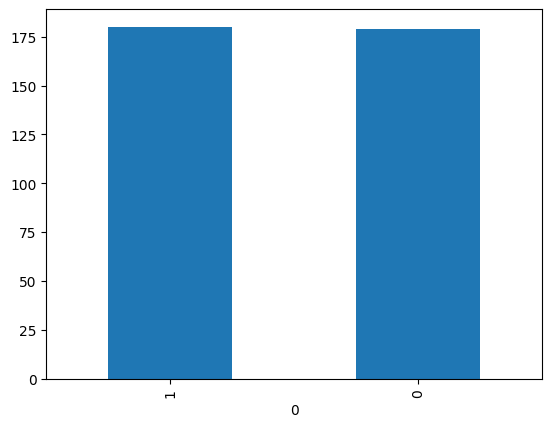

In [80]:
data[data.columns[-1]].value_counts().plot(kind='bar')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [82]:
dtcmodel = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 5, min_samples_split=2)

In [83]:
dtcmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [84]:
y_pred = dtcmodel.predict(X_test)

In [85]:
print(sklearn.metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.98      0.98      0.98        41

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



C:\Users\Arseny\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


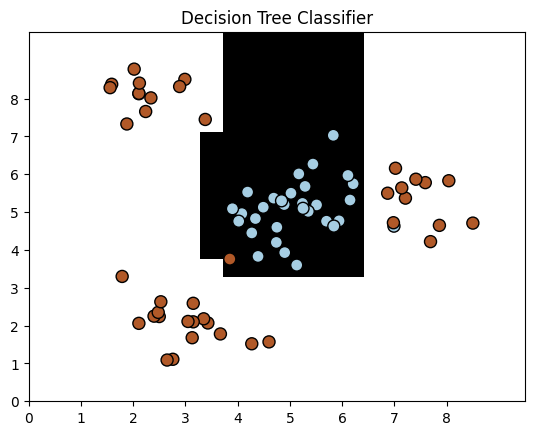

In [86]:
visualize_classifier(dtcmodel, X_test, y_test, 'Decision Tree Classifier')

In [87]:
parameter_grid = {
    'max_depth': [3, 5, 8, 10, None],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [2,3,4, 5],
    'criterion': ['gini']
    }

grid_search = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 8, 10, None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='accuracy')

In [88]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Лучшая точность: 0.9581377151799687


In [89]:

data = np.loadtxt("data_random_forests.txt", delimiter=",")
X, y = data[:, :-1], data[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None]
}


rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

et_grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5, scoring='accuracy')
et_grid.fit(X_train, y_train)
et_best = et_grid.best_estimator_


print("Лучшие параметры Random Forest:", rf_grid.best_params_)
print("Лучшие параметры Extra Trees:", et_grid.best_params_)

Лучшие параметры Random Forest: {'max_depth': 5, 'n_estimators': 100}
Лучшие параметры Extra Trees: {'max_depth': 5, 'n_estimators': 100}


<BarContainer object of 3 artists>

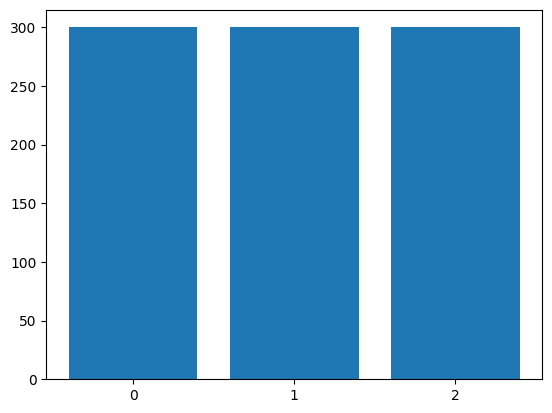

In [90]:
zeros_count = (data[:, -1] == 0).sum()
ones_count = (data[:, -1] == 1).sum()
twos_count = (data[:,-1] == 2).sum()
classes = ['0','1','2']
counts = [zeros_count, ones_count, twos_count]
plt.bar(classes, counts)

In [91]:
rfcmodel = RandomForestClassifier(max_depth=5, n_estimators=10)
etcmodel = ExtraTreesClassifier(max_depth=5 , n_estimators= 100)

In [92]:
rfcmodel.fit(X,y)
etcmodel.fit(X,y)

ExtraTreesClassifier(max_depth=5)

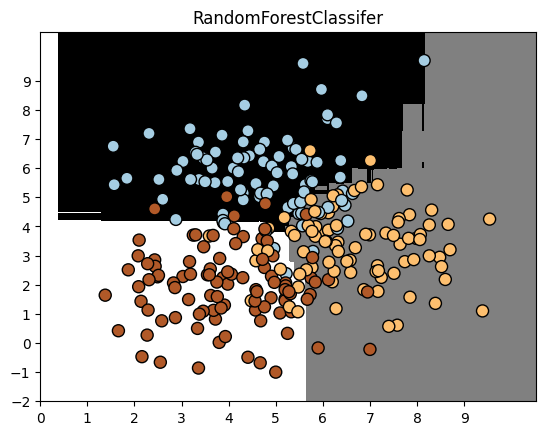

In [93]:
visualize_classifier(rfcmodel, X_test, y_test, 'RandomForestClassifer')

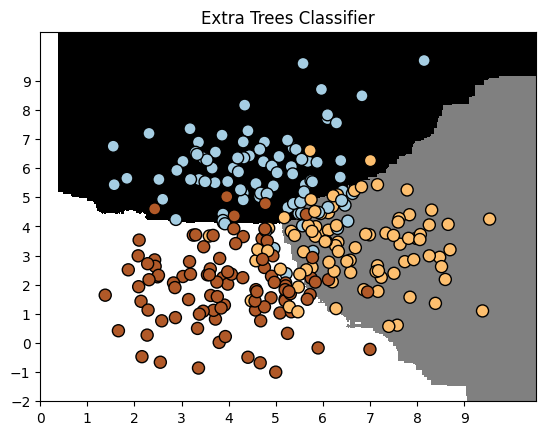

In [94]:
visualize_classifier(etcmodel, X_test, y_test, 'Extra Trees Classifier')

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60        45
         1.0       0.93      0.94      0.93       255

    accuracy                           0.89       300
   macro avg       0.78      0.76      0.77       300
weighted avg       0.88      0.89      0.88       300



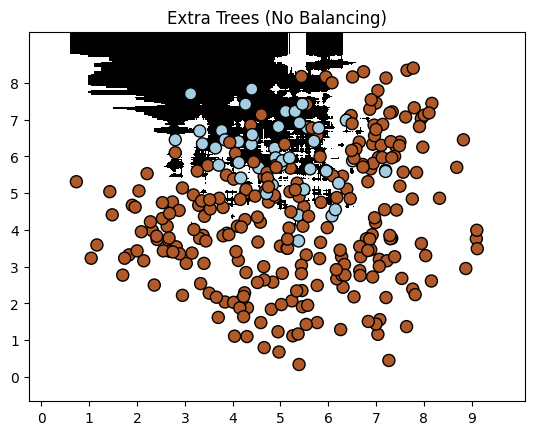

In [ ]:
data_imbalance = np.loadtxt("data_imbalance.txt", delimiter=",")
X, y= data_imbalance[:, :-1], data_imbalance[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

et_imb = ExtraTreesClassifier()
et_imb.fit(X_train, y_train)

y_pred = et_imb.predict(X_test)
print(sklearn.metrics.classification_report(y_test, y_pred))

visualize_classifier(et_imb, X_test, y_test, title="Extra Trees (No Balancing)")

In [ ]:
X_train

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62        45
         1.0       0.93      0.94      0.94       255

    accuracy                           0.89       300
   macro avg       0.79      0.77      0.78       300
weighted avg       0.89      0.89      0.89       300



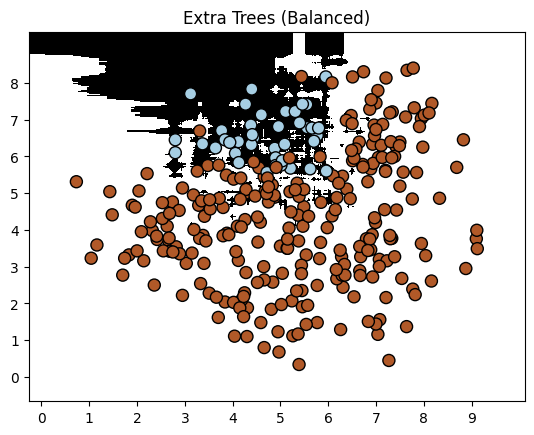

In [100]:
et_balanced = ExtraTreesClassifier(class_weight={0: 1, 1: 1})
et_balanced.fit(X_train, y_train)

y_pred_balanced = et_balanced.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred_balanced))

visualize_classifier(et_balanced, X_test, y_pred_balanced, title="Extra Trees (Balanced)")

In [ ]:
X_train

In [97]:
# Сетка параметров для Random Forest
import sklearn.metrics


param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'class_weight': [None, 'balanced']
}

# GridSearchCV для Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='precision_weighted', return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Метрики для каждого набора параметров
print("Результаты GridSearchCV:")
for params, mean_score in zip(grid_search_rf.cv_results_['params'], grid_search_rf.cv_results_['mean_test_score']):
    print(f"{params} => precision_weighted: {mean_score:.4f}")

# Лучшая модель и отчет
rf_best_grid = grid_search_rf.best_estimator_
y_pred_rf = rf_best_grid.predict(X_test)
print("Классификационный отчет:")
print(sklearn.metrics.classification_report(y_test, y_pred_rf))


Результаты GridSearchCV:
{'class_weight': None, 'max_depth': 5, 'n_estimators': 10} => precision_weighted: 0.8810
{'class_weight': None, 'max_depth': 5, 'n_estimators': 50} => precision_weighted: 0.8824
{'class_weight': None, 'max_depth': 5, 'n_estimators': 100} => precision_weighted: 0.8818
{'class_weight': None, 'max_depth': 10, 'n_estimators': 10} => precision_weighted: 0.8500
{'class_weight': None, 'max_depth': 10, 'n_estimators': 50} => precision_weighted: 0.8659
{'class_weight': None, 'max_depth': 10, 'n_estimators': 100} => precision_weighted: 0.8593
{'class_weight': None, 'max_depth': None, 'n_estimators': 10} => precision_weighted: 0.8494
{'class_weight': None, 'max_depth': None, 'n_estimators': 50} => precision_weighted: 0.8592
{'class_weight': None, 'max_depth': None, 'n_estimators': 100} => precision_weighted: 0.8530
{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 10} => precision_weighted: 0.8937
{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 50}